In [24]:
import numpy as np
from collections import Counter
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA

In [25]:
class KNN:
  def __init__(self,k=3):
    self.k=k

  def fit(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train

  def _euclidean_distance(self,x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def predict(self,X_test):
    predictions=[self._predict(x) for x in X_test]
    return np.array(predictions)

  def _predict(self,x):
    distances=[self._euclidean_distance(x,x_train) for x_train in self.X_train]
    k_indices=np.argsort(distances)[:self.k]
    k_nearest_labels=[self.y_train[i] for i in k_indices]
    most_common=Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]




In [26]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(f"Original shape of X_train : {X_train.shape}")
X_train=X_train.reshape(X_train.shape[0],-1)
print(f"Reshaped shape of X_train : {X_train.shape}")
X_test=X_test.reshape(X_test.shape[0],-1)
print(f"Reshaped shape of X_test : {X_test.shape}")
y_train=y_train.flatten()
y_test=y_test.flatten()

X_train=X_train[:5000]
y_train=y_train[:5000]
X_test=X_test[:100]
y_test=y_test[:100]
#normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
#pca
pca = PCA(n_components=100)  # Reduce to 100 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn=KNN(3)
knn.fit(X_train_pca,y_train)
predictions=knn.predict(X_test_pca)
accuracy=np.mean(predictions==y_test)
print(f"accuracy is {accuracy}")

Original shape of X_train : (50000, 32, 32, 3)
Reshaped shape of X_train : (50000, 3072)
Reshaped shape of X_test : (10000, 3072)
accuracy is 0.33


In [27]:
pip install pillow

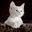

predicted_label is : frog


In [28]:
from PIL import Image
import requests
from io import BytesIO
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

def load_and_prepare_image(url):
  response = requests.get(url)
  img=Image.open(BytesIO(response.content)).convert('RGB')
  img=img.resize((32,32))
  img_array=np.array(img)
  img_flat=img_array.reshape(-1)
  img_flat=img_flat/255.0
  img_pca = pca.transform([img_flat])
  return img,img_pca

image_url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
img, img_vector = load_and_prepare_image(image_url)
display(img)

predicted_label=knn.predict(img_vector)[0]
print(f"predicted_label is : {cifar10_labels[predicted_label]}")